# Visualization with Python



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`

# https://matplotlib.org/

In [1]:
import pandas as np

## equivalent to %pylab inline

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

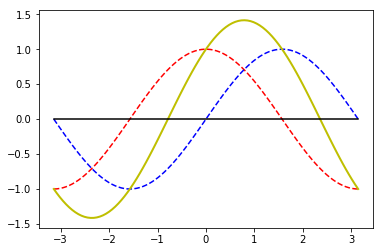

In [33]:
X=np.linspace(-np.pi, np.pi,100)
C,S=np.cos(X), np.sin(X)
zeros=np.zeros(100)
plt.plot(X,C, color='r', linestyle='--')
plt.plot(X,S, color='b', linestyle='--')
plt.plot(X,C+S, color='y', linewidth=2)
plt.plot(X,zeros, color='k');



### Scatter plots

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


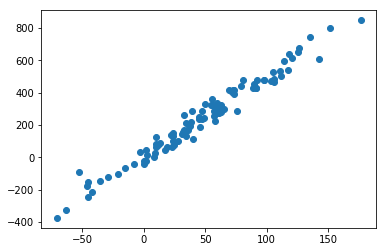

In [41]:
true_theta_0=2
true_theta_1=5

X= (np.random.randn(100)+1)*50

jitter=50*np.random.randn(100)

Y=true_theta_0+true_theta_1*X
Y_random=Y+jitter

plt.scatter(X,Y_random)
plt.show()

In [45]:
true_theta_0=2
true_theta_1=5

X= (np.random.randn(100)+1)*50

X_ordenado=X.sort()

print(X_ordenado)

jitter=50*np.random.randn(100)

Y=true_theta_0+true_theta_1*X_ordenado
Y_random=Y+jitter

plt.plot(X_ordenado,Y_random)
plt.show()



None


TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

In [46]:
X.sort()

### Bar plots

Do not confuse with histograms

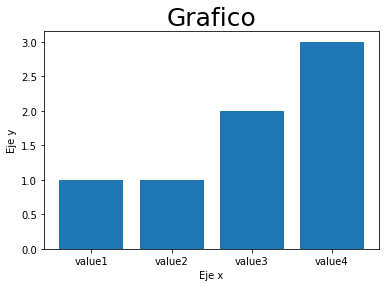

In [67]:
X=[1,1,2,3]
Y=['value1', 'value2', 'value3', 'value4']

plt.bar(range(len(X)), X)

plt.xticks(np.arange(len(X)), Y)
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.title('Grafico',fontdict={'fontsize': 25})
plt.show()

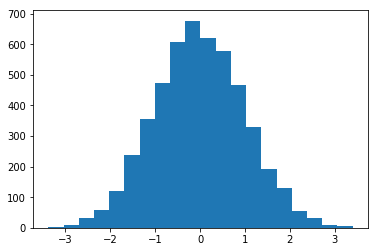

In [69]:
X_normal=np.random.normal(size=5000)
plt.hist(X_normal, bins=20);

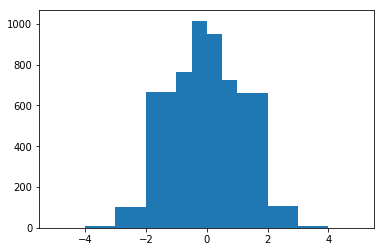

In [71]:
X_normal=np.random.normal(size=5000)
plt.hist(X_normal, bins=[-5,-4,-3,-2,-1,-0.5,0,0.5,1,2,3,4,5]);

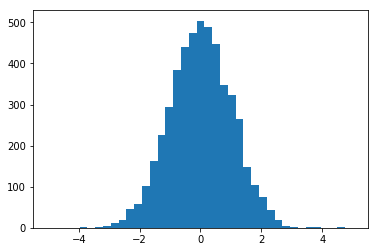

In [73]:
X_normal=np.random.normal(size=5000)
plt.hist(X_normal, bins=np.linspace(-5,5,40));

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

### `figure.subplots()`

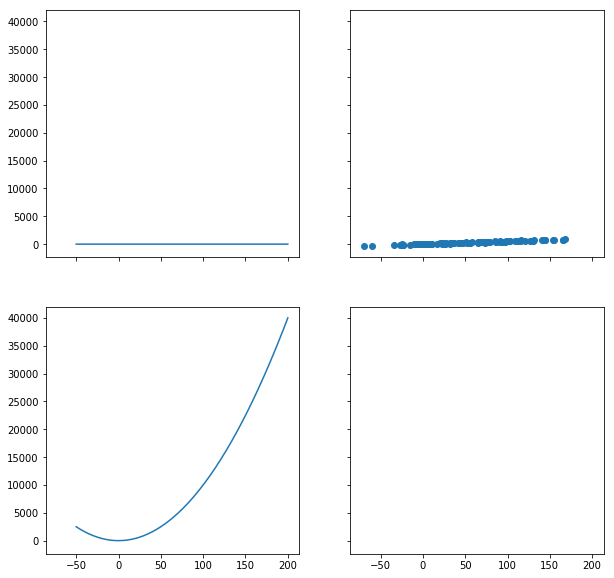

In [91]:
figura, ejes =plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))

figura



X= (np.random.randn(100)+1)*50

jitter=50*np.random.randn(100)

Y=true_theta_0+true_theta_1*X
Y_random=Y+jitter

x2=np.linspace(-50,200,200)
y2=1/(1+np.exp(-x2))

ejes[0,0].plot(x2,y2)
ejes[0,1].scatter(X,Y_random)
ejes[1,0].plot(x2,x2**2)

#ejes2=figura.add_axes(figsize=(10,8))
#ejes2.plot(x2,x2**(1/2))




plt.show()

### Sharing axis

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

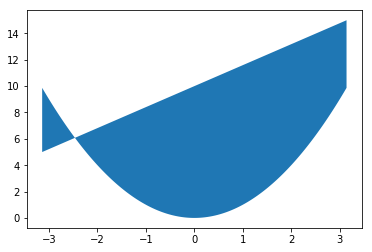

In [93]:
n=256

x1=np.linspace(-np.pi,np.pi,n)

y1=np.linspace(5,15,n)

y2=x1**2

plt.fill_between(x1,y1,y2);

## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



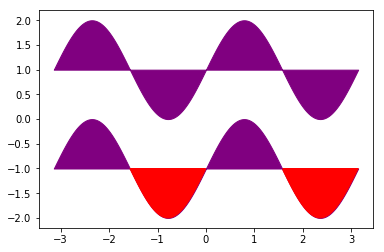

In [122]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)
unos=np.ones(n)
menosunos=-np.ones(n)

ycosa=Y.copy()

for i,elemento in enumerate(ycosa):
    if elemento<0:
        ycosa[i]=elemento
    else:
        ycosa[i]=0

plt.fill_between (X, Y+1, unos, color='purple', alpha=1.00)
plt.fill_between (X, Y-1,menosunos, color='purple', alpha=1.00)
plt.fill_between (X,Y-1, menosunos, color='red', where=Y<=0, alpha=1.00)
plt.show()


In [129]:
for elemento: if elemento<0: elemento in Y

SyntaxError: invalid syntax (<ipython-input-129-0594f7584b2f>, line 1)

In [148]:
ycosa=list(x if x<=0 else 0 for x in Y)
ycosa

SyntaxError: invalid syntax (<ipython-input-148-4028968c02c0>, line 1)

In [150]:
ycosa=list(x for x in Y  if x<=0 )
ycosa

[-0.012319659535238529,
 -0.061560906133942786,
 -0.1106526818915011,
 -0.1594757912099809,
 -0.20791169081775931,
 -0.25584277759443586,
 -0.30315267411304364,
 -0.34972651120626114,
 -0.3954512068705424,
 -0.44021574083098747,
 -0.4839114241003016,
 -0.5264321628773557,
 -0.5676747161445903,
 -0.6075389463388169,
 -0.6459280624867872,
 -0.6827488552151856,
 -0.717911923064442,
 -0.7513318895568732,
 -0.7829276104921029,
 -0.8126223709664456,
 -0.8403440716378927,
 -0.8660254037844385,
 -0.8896040127307094,
 -0.9110226492460884,
 -0.9302293085467404,
 -0.9471773565640402,
 -0.961825643172819,
 -0.9741386021045101,
 -0.9840863373026043,
 -0.9916446955107429,
 -0.9967953249171991,
 -0.9995257197133659,
 -0.9998292504580527,
 -0.9977051801738729,
 -0.9931586661366362,
 -0.9862007473534027,
 -0.9768483177596007,
 -0.965124085200289,
 -0.9510565162951535,
 -0.9346797673211107,
 -0.9160336012803336,
 -0.8951632913550625,
 -0.8721195109836106,
 -0.846958210824467,
 -0.819740482907221,
 -0.79

## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

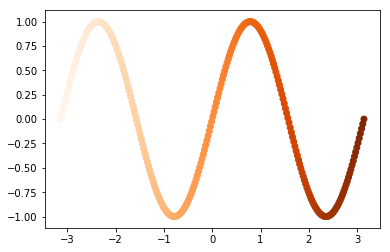

In [155]:
from matplotlib import cm

cmap=cm.get_cmap('Oranges')

plt.scatter(X,Y, c=X, cmap=cmap);

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

![Color exercise](figs/scatter_ex.png)

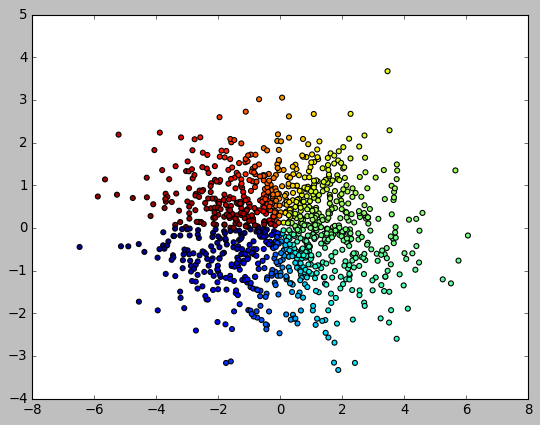

In [175]:
n = 1024
X = np.random.normal(0,2,n)
Y = np.random.normal(0,1,n)
AT=np.arctan2(Y,X)

plt.scatter(X,Y, c=AT)
plt.show()

### Markers and linestyles

In [ ]:
plt.style.use('classic')

In [169]:

plt.style.available


['seaborn-dark-palette',
 'seaborn-notebook',
 'fivethirtyeight',
 'seaborn-dark',
 'fast',
 'Solarize_Light2',
 'grayscale',
 'seaborn',
 'seaborn-muted',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'tableau-colorblind10',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-paper',
 'classic',
 'seaborn-white',
 'seaborn-talk',
 'dark_background',
 'ggplot',
 'seaborn-ticks',
 'bmh',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-deep',
 '_classic_test']

In [176]:
mp.rcParams

/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


RcParams({'_internal.classic_mode': True,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'mpeg4',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'round_numbers',
          'axes.axisbelow': False,
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 2,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

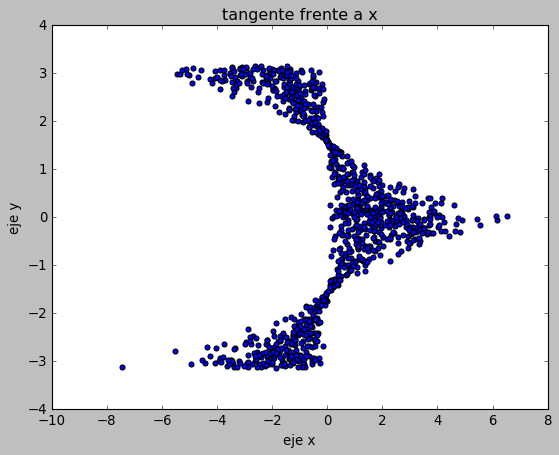

In [185]:
n = 1024
X = np.random.normal(0,2,n)
Y = np.random.normal(0,1,n)
AT=np.arctan2(Y,X)

figura ,eje=plt.subplots(ncols=1,nrows=1)

eje.set_xlabel('eje x')
eje.set_ylabel('eje y')

eje.set_title('tangente frente a x')


plt.scatter(X,AT);

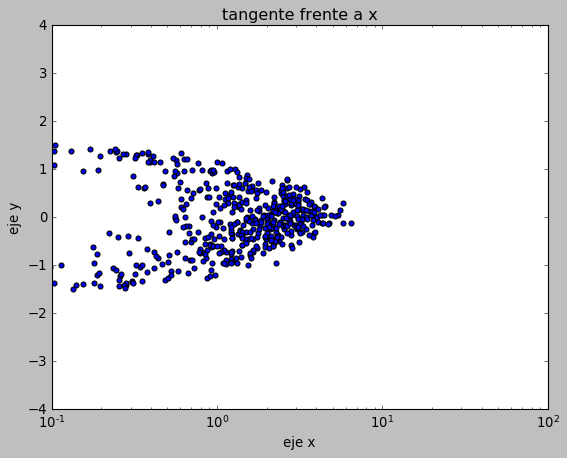

In [187]:
n = 1024
X = np.random.normal(0,2,n)
Y = np.random.normal(0,1,n)
AT=np.arctan2(Y,X)

figura ,eje=plt.subplots(ncols=1,nrows=1)

eje.set_xlabel('eje x')
eje.set_ylabel('eje y')

eje.set_xscale('log')
#eje.set_yscale('log')

eje.set_title('tangente frente a x')


plt.scatter(X,AT);

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.



Esto es una fórmula:
    
    $$f_x(a)=\mu*a^3$$

## Legends

## Ticks, tick labels, limits

### Ticks

### Tick labels

### Limits

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



#### Exercise:

Load the `houses.csv` file into memory as a pandas `DataFrame`. Inspect its head. Clean the column names.

## Seaborn vs matplotlib



## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

### Scatter plots

### Histogram

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

## Categorical data

https://www.kaggle.com/c/titanic/download/train.csv

https://seaborn.pydata.org/tutorial/categorical.html

### Swarm plot

### Boxplot

### Barplot / countplot

### Pointplot

## Other types

### Heatmap

### Clustermap

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

## Dash

"Shiny for Python" 


# See Also: Vega

http://vega.github.io/

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)